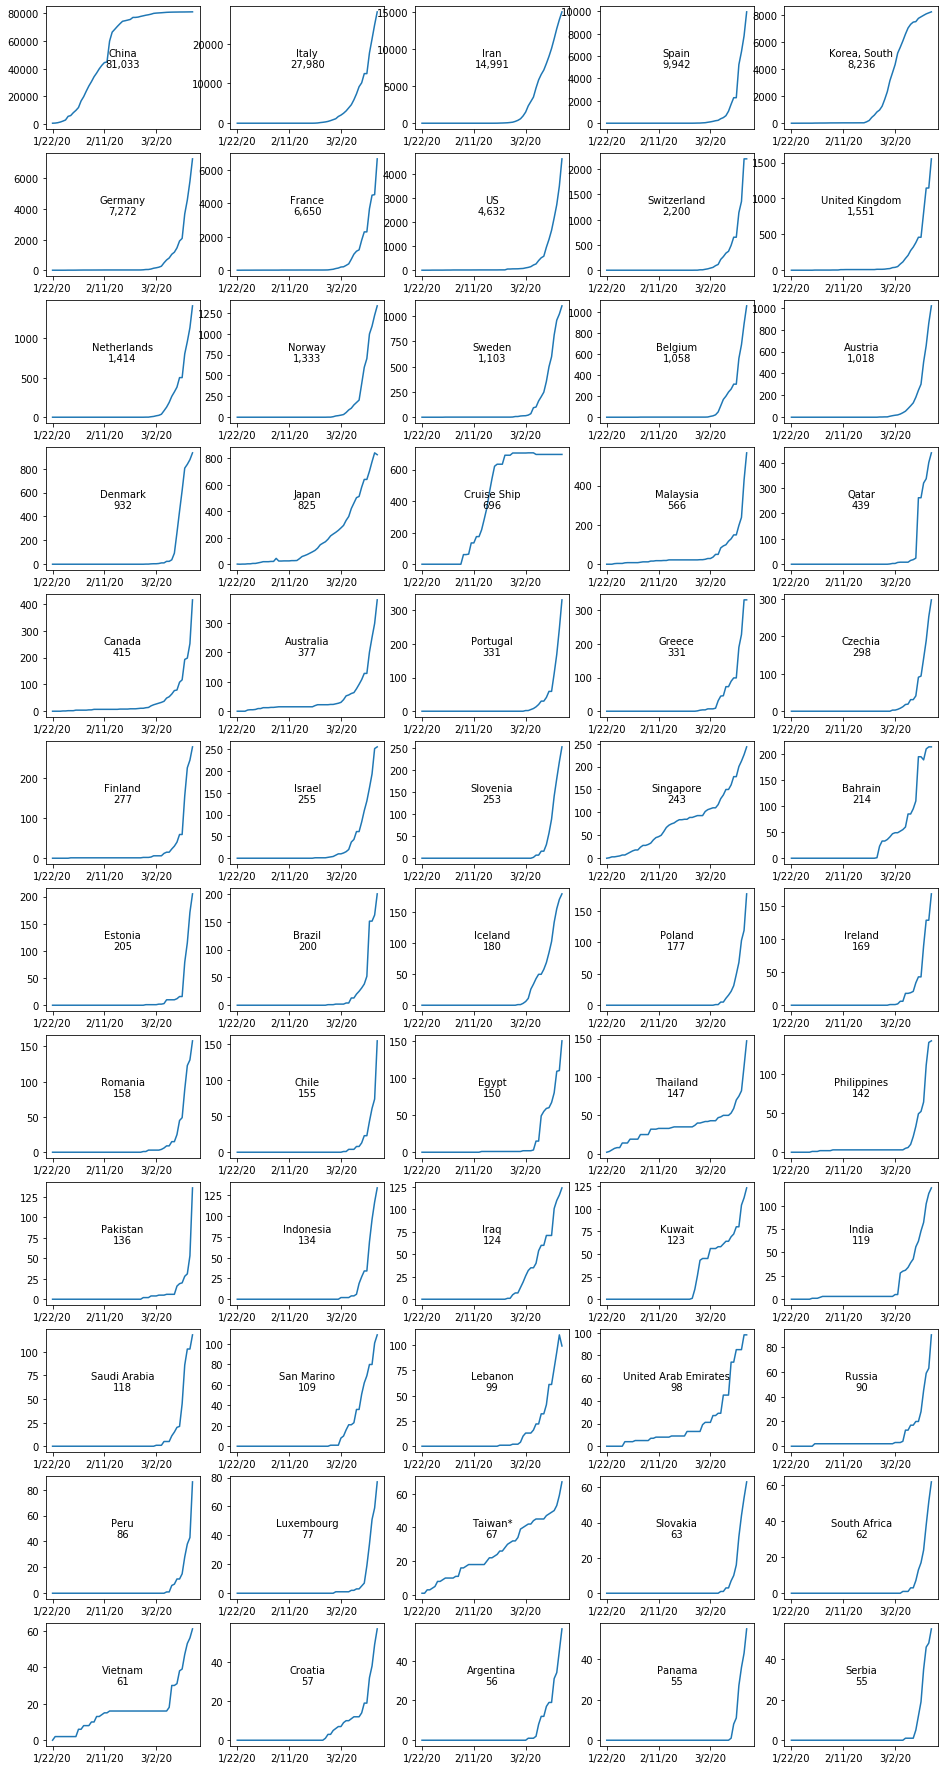

In [1]:
%matplotlib inline
import re
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

date_cols = [c for c in df.columns if re.match(r'[\d/]+', c)]
country_ts = df.groupby('Country/Region')[date_cols].sum().T
country_totals = country_ts.iloc[-1]

nrows = 12
ncols = 5
N = nrows * ncols
top = country_totals.sort_values(ascending=False).head(N).index.values
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 32))
for i, country in enumerate(top):
    total = country_totals.loc[country]
    ax = axes[i//ncols][i%ncols]
    country_ts[country].plot(ax=ax)
    ax.text(0.5, 0.5, f'{country}\n{total:,}', transform=ax.transAxes, horizontalalignment='center')